In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pickle
import json


with open("energies_int_750.pkl", 'rb') as file:
    energies_int = pickle.load(file)

with open("energies_errors_750.pkl", 'rb') as file:
    energies_errors = pickle.load(file)

with open("energies_single_750.pkl", "rb") as file:
    energies_single = pickle.load(file)

with open("occupied_info_750.pkl", "rb") as file:
    occupied_info = pickle.load(file)

with open("occupied_levels_750.pkl", "rb") as file:
    occupied_levels = pickle.load(file)
    
# Initialize the states dictionary
states = {}
# state_num, value

# Load the pickled files into the dictionary
for i in range(10):
    try:
        with open(f"state750_{i}.pkl", "rb") as file:
            states[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

print(states[0].energy / (np.pi)**2, states[1].energy)

0.03981029681282992 0.9822797011958336


In [9]:
energies_errors_2 = []
analytic_energies = np.zeros(10)
l = 5
points = 750
x = np.linspace(0, l, points)
dx = x[1] - x[0]
for i in range(len(analytic_energies)):
    analytic_energies[i] = ((i+1)**2) / (2*((l+2*dx)**2))


energies_errors_2 = np.abs(analytic_energies - energies_single)
print(energies_errors_2)
print(max(energies_errors), max(energies_errors_2))

[6.38279010e-06 2.55311604e-05 5.74451109e-05 2.02124642e-04
 2.59569753e-04 4.29780444e-04 6.12756715e-04 7.08498566e-04
 9.17005998e-04 1.13827901e-03]
0.009500000000000064 0.001138279010143517


(750, 750)
(750, 750)


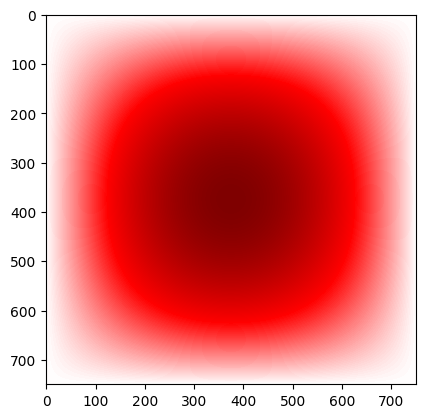

In [10]:
ground = states[0]

def wave_function(l, n, X):
    return np.sqrt(2/l) * np.sin((np.pi) * X * (n+1) / l)
x_1 = np.linspace(0, 5, 750)
x_2 = np.linspace(0, 5, 750)
X_1, X_2 = np.meshgrid(x_1, x_2)
ground_analytic = (1 / np.sqrt(2))*(wave_function(5, 0, X_1) * wave_function(5, 1, X_2) + wave_function(5, 0, X_2) * wave_function(5, 1, X_1))
print(ground_analytic.shape)
print(ground.space.shape)

plt.imshow(ground.space.real, cmap="seismic", vmax=np.max(ground.space.real), vmin=-np.max(ground.space.real))
plt.show()


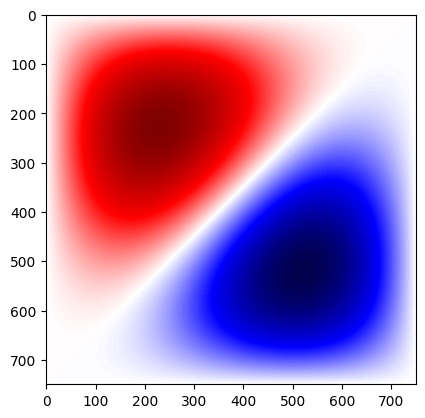

In [11]:
plt.imshow(ground_analytic, cmap="seismic", vmax=np.max(ground_analytic), vmin=-np.max(ground_analytic))

In [12]:
print(np.isclose(ground_analytic, ground.space.real))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [13]:
with open("occupations_750.json", "w") as f:
    json.dump(occupied_levels, f)

for key, value in occupied_levels.items():
    print(f'{key}: {value}')
    print('---') 

State = 0: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0199, 0.0199]', 'Total energy = 0.0398')
---
State = 1: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0199, 0.0796]', 'Total energy = 0.0995')
---
State = 2: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0796, 0.0199]', 'Total energy = 0.0995')
---
State = 3: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0796, 0.0796]', 'Total energy = 0.1592')
---
State = 4: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [2]', 'Energy of occupied orbitals: [0.0199, 0.1791]', 'Total energy = 0.199')
---
State = 5: ('Orbitals occupied by up: [2]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.1791, 0.0199]', 'Total energy = 0.199')
---
State = 6: ('Orbitals occupied by up: [1]', 'Orbitals occupied by 

In [14]:
# print results

print("Energies of interacting method 'ud'")
for i, value in enumerate(energies_int):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Energies of interacting method 'u'")
for i, value in enumerate(energies_single):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Errors")
for i, value in enumerate(energies_errors):
    print(f"State = {i}, error = {value} per pi squared")
    

Energies of interacting method 'ud'
State = 0, energy = 0.0398 per pi squared
State = 1, energy = 0.0995 per pi squared
State = 2, energy = 0.0995 per pi squared
State = 3, energy = 0.1592 per pi squared
State = 4, energy = 0.1991 per pi squared
State = 5, energy = 0.1991 per pi squared
State = 6, energy = 0.2588 per pi squared
State = 7, energy = 0.2588 per pi squared
State = 8, energy = 0.3384 per pi squared
State = 9, energy = 0.3384 per pi squared

Energies of interacting method 'u'
State = 0, energy = 0.0199 per pi squared
State = 1, energy = 0.0796 per pi squared
State = 2, energy = 0.1791 per pi squared
State = 3, energy = 0.3185 per pi squared
State = 4, energy = 0.4976 per pi squared
State = 5, energy = 0.7166 per pi squared
State = 6, energy = 0.9754 per pi squared
State = 7, energy = 1.2739 per pi squared
State = 8, energy = 1.6123 per pi squared
State = 9, energy = 1.9905 per pi squared

Errors
State = 0, error = 9.99999999999994e-05 per pi squared
State = 1, error = 0.0003

In [15]:
# print the degenerate states

for i in range(len(energies_int)):
    if energies_int[i] == energies_int[i-1]:
        print(f"State {i-1} and {i} have the same energy")

State 1 and 2 have the same energy
State 4 and 5 have the same energy
State 6 and 7 have the same energy
State 8 and 9 have the same energy


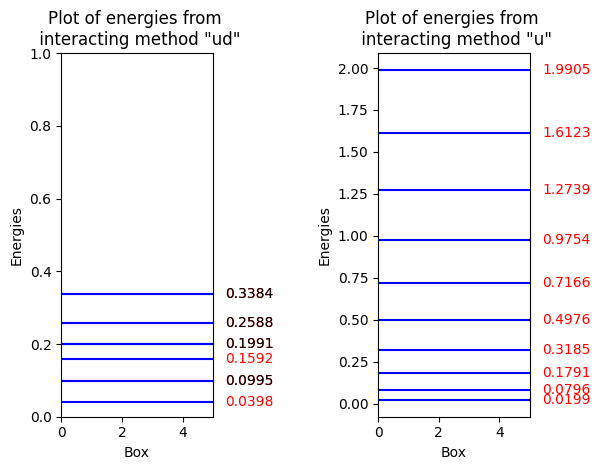

In [16]:
# plot the energies

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim(0, 5)
ax2.set_xlim(0, 5)
for i, value in enumerate(energies_int):
    ax1.axhline(y=value, color='b', linestyle='-')
    if energies_int[i] == energies_int[i-1]:
        ax1.text(x=7, y=value, s=f'{value}', color='black', va='center', ha='right')
    else:
        ax1.text(x=7, y=value, s=f'{value}', color='red', va='center', ha='right')

for i, value in enumerate(energies_single):
    ax2.axhline(y=value, color='b', linestyle='-')
    ax2.text(x=7, y=value, s=f'{value}', color='red', va='center', ha='right')


ax1.set_title('Plot of energies from \n interacting method "ud"')
ax2.set_title('Plot of energies from \n interacting method "u"')
ax1.set_xlabel("Box")
ax1.set_ylabel("Energies")
ax2.set_xlabel("Box")
ax2.set_ylabel("Energies")
plt.tight_layout()
plt.savefig("pib_750_energy_levels.png")
plt.show()

In [17]:

# occupied-info[state][0: up_occ_index, 1: down_occ_index, 2: orbital_energy, 3: energy_sum]

# Function to update the plot

# Define the function to update the plot
def update_plot(k):
    plt.figure(figsize=(3, 4))
    plt.clf()

    # Plot horizontal lines and text for each value in energies_single
    for i, value in enumerate(energies_single):
        plt.axhline(y=value, color='b', linestyle='-')
        plt.text(x=(1.3), y=value, s=f'{value}', color='red', va='center', ha='right')
    
    if occupied_info[k][2][0] == occupied_info[k][2][1]:
        plt.plot(0.25, occupied_info[k][2][0], "ro")
        plt.plot(0.75, occupied_info[k][2][1], "go")
    else:
        plt.plot(0.5, occupied_info[k][2][0], "ro")
        plt.plot(0.5, occupied_info[k][2][1], "go")

    plt.xlim(0, 1)
    plt.ylim(min(energies_single) - 0.05 , max(energies_single) + 1)
    plt.title("k-state occupation, up=red, down=green")
    plt.show()

# Create a slider widget
k_slider = widgets.IntSlider(value=5, min=0, max=len(occupied_info) - 1, step=1, description='k:')

# Update the plot when the slider value changes
widgets.interact(update_plot, k=k_slider)

# Display the slider
display(k_slider)



interactive(children=(IntSlider(value=5, description='k:', max=9), Output()), _dom_classes=('widget-interact',…

IntSlider(value=5, description='k:', max=9)

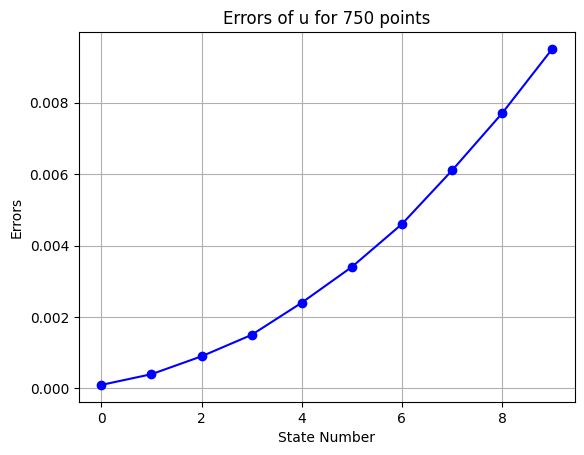

In [18]:
plt.plot(energies_errors, "bo")
plt.plot(energies_errors, "b-")
plt.ylabel("Errors")
plt.xlabel("State Number")
plt.title("Errors of u for 750 points")
plt.savefig("pib_750_errors.png")
plt.grid()


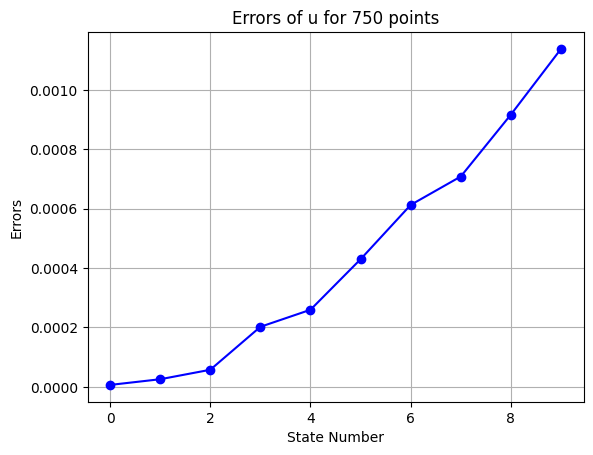

In [19]:
plt.plot(energies_errors_2, "bo")
plt.plot(energies_errors_2, "b-")
plt.ylabel("Errors")
plt.xlabel("State Number")
plt.title("Errors of u for 750 points")
plt.savefig("pib_750_errors_2.png")
plt.grid()